<a href="https://colab.research.google.com/github/20211527/dl07/blob/main/notebook/ch03_ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to ML
### sklearn
* iris : knn
* logist:knn
*confusion matrix (혼돈행결)

# iris dataset

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
print(iris)
# iris.data.shape
# iris.target.shape
# print(iris.target_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
y_train.shape,y_test.shape

((120,), (30,))

###Training (학습)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
y_pred,y_test

(array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]),
 array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]))

### 정확도  평가

In [ ]:
from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9666666666666667


### 새 데이터에 적용

In [ ]:


#######################
#  Test on new data
#######################
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 전혀 보지 못한 새로운 데이터를 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


versicolor
setosa


### Decision boundary

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

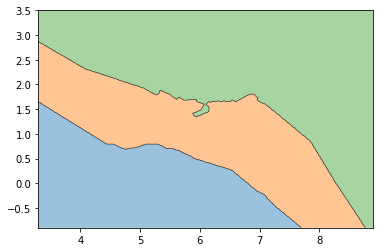

In [ ]:
############################################################
# Decision boundary
# from mlxtend.plotting import plot_decision_regions
############################################################
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Plotting decision regions of two features
ft_names = iris.feature_names
two_feature_idx = [0,3]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=knn2, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('KNN3 on Iris')
plt.show()

### SYM

TypeError: ignored

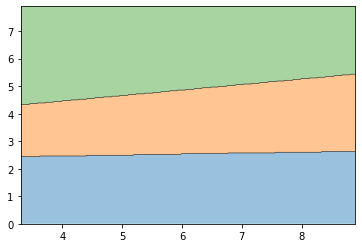

In [ ]:

########################################################
# SVM
########################################################
# Training a classifier
from sklearn.svm import SVC

ft_names = iris.feature_names
two_feature_idx = [0,2]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=svm, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('SVM on Iris')
plt.show()
########################################################

___

# mnist data
 * knn

### Load digits dataset

In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
str(digits)
# digits.data.shape
# digits.target.shape

'{\'data\': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],\n       [ 0.,  0.,  0., ..., 10.,  0.,  0.],\n       [ 0.,  0.,  0., ..., 16.,  9.,  0.],\n       ...,\n       [ 0.,  0.,  1., ...,  6.,  0.,  0.],\n       [ 0.,  0.,  2., ..., 12.,  0.,  0.],\n       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), \'target\': array([0, 1, 2, ..., 8, 9, 8]), \'frame\': None, \'feature_names\': [\'pixel_0_0\', \'pixel_0_1\', \'pixel_0_2\', \'pixel_0_3\', \'pixel_0_4\', \'pixel_0_5\', \'pixel_0_6\', \'pixel_0_7\', \'pixel_1_0\', \'pixel_1_1\', \'pixel_1_2\', \'pixel_1_3\', \'pixel_1_4\', \'pixel_1_5\', \'pixel_1_6\', \'pixel_1_7\', \'pixel_2_0\', \'pixel_2_1\', \'pixel_2_2\', \'pixel_2_3\', \'pixel_2_4\', \'pixel_2_5\', \'pixel_2_6\', \'pixel_2_7\', \'pixel_3_0\', \'pixel_3_1\', \'pixel_3_2\', \'pixel_3_3\', \'pixel_3_4\', \'pixel_3_5\', \'pixel_3_6\', \'pixel_3_7\', \'pixel_4_0\', \'pixel_4_1\', \'pixel_4_2\', \'pixel_4_3\', \'pixel_4_4\', \'pixel_4_5\', \'pixel_4_6\', \'pixel_4_7\', \'pixel_5_0\', \'pixel_

In [5]:
digits.data.shape,digits.target.shape

((1797, 64), (1797,))

In [7]:
digits.target[:30]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
digits.images.shape,digits.data.shape

((1797, 8, 8), (1797, 64))

### 데이터 그리기

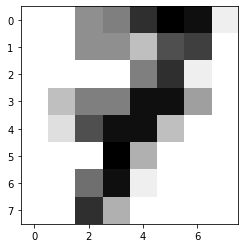

In [14]:
plt.imshow(digits.images[7], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
# digits.images.shape

In [17]:
digits.images.shape, len(digits.images)

((1797, 8, 8), 1797)

In [19]:
n_samples = len(digits.images)
#digits.images.shape
# Flattening (평탄화) : (8, 8) => (64,)
data = digits.images.reshape((n_samples, -1))
# data.shape

0.9888888888888889
[9]


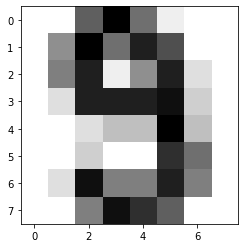

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

9 [9]


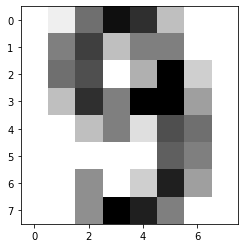

In [23]:
idx = 75
plt.imshow(X_test[idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_test[idx],y_pred)

In [24]:
#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

print(scores)

[0.9833333333333333, 0.9861111111111112, 0.9916666666666667, 0.9916666666666667, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9861111111111112, 0.9833333333333333]


[0.9833333333333333, 0.9861111111111112, 0.9916666666666667, 0.9916666666666667, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9861111111111112, 0.9833333333333333]


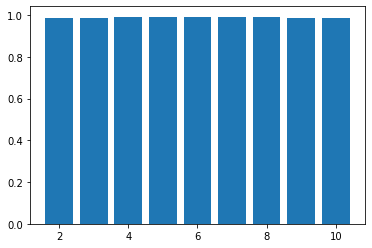

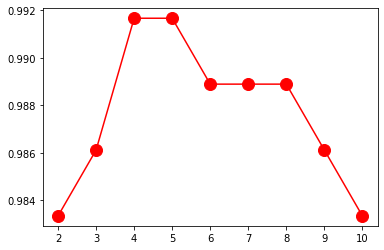

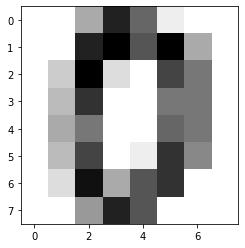

0.9888888888888889
[0]


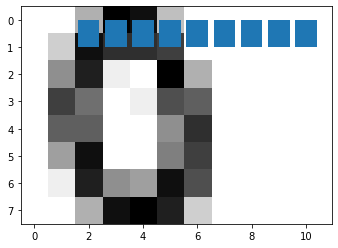

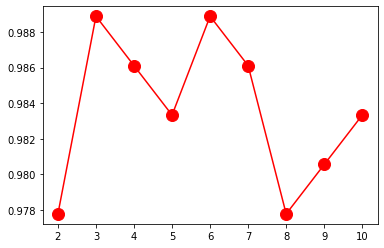

In [27]:

#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

print(scores)

# Plot scores w.r.t. n_neighbors
plt.bar(range(2,11), scores)
# plt.ylim((0.95,1))
plt.show()

plt.plot(range(2,11), scores,'ro-', ms=12)
# plt.ylim((0.95,1))
plt.show()

import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
# str(digits)
# digits.data.shape
# digits.target.shape

plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
# digits.images.shape

n_samples = len(digits.images)
digits.images.shape
# Flattening (평탄화) : (8, 8) => (64,)
data = digits.images.reshape((n_samples, -1))
# data.shape

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

scores

# Plot scores w.r.t. n_neighbors
plt.bar(range(2,11), scores)
# plt.ylim((0.95,1))
plt.show()

plt.plot(range(2,11), scores,'ro-', ms=12)
# plt.ylim((0.95,1))
plt.show()

    